# SOK-1006 v23
## Innleveringsoppgave 2
### Analyse av en merverdiavgift ("ad valorem tax")

Her skal vi se på virkningen av å ilegge en vare en skatt i henhold til dens verdi (merverdiavgift). Betrakt fremstillingen av markedet for oppdrettslaks i læreboka s. 101-104. Etterspørsel er gitt ved


\begin{equation}
   x^{D}= 500 -3.2p_k\tag{1}
\end{equation}

og tilbud:


\begin{equation}
   x^{S}= -100 + 4.3p_s\tag{2}
\end{equation}

Kjøpere betaler $p_k$ og selgere får $p_s$. Prisen som selgere får er det som konsumenter betaler minus mva $tp_k$, noe som betyr at $p_s=(1-t)p_k$. Her er $1>t\geq 0$ avgiftssatsen. Vi kan skrive (2) også som en funksjon på prisen som konsumenten betaler:

\begin{equation}
   x^{S}= -100 + 4.3 p_k(1-t)\tag{3}
\end{equation}



In [3]:
# importer pakkene
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

In [31]:
# Etterspørsel i likning (1)

def x_d(p):
    return 500 - 3.2*p

#Tilbud i likning (3)

def x_s(p,t):
    return -100+4.3*p*(1-t)

def x_s2(p,t):
    return -100+4.3*p


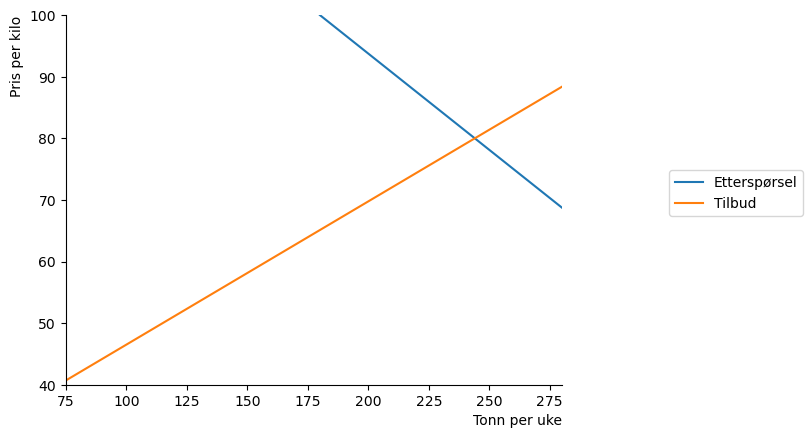

In [5]:
# vi lager en basisfigur

p_num=np.linspace(0.1,100,100)

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris per kilo', loc='top')
                ax.set_xlabel('Tonn per uke', loc='right')
                ax.set(xlim=(75,280))
                ax.set(ylim=(40,100))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

# plott funksjonene

ax.plot(x_d(p_num),p_num, label='Etterspørsel')

ax.plot(x_s(p_num, 0),p_num, label='Tilbud')

ax.legend(bbox_to_anchor=(1.5,0.6));

   
1. Tegn inn tilbudsfunksjon med 25% mva, og forklar hvorfor denne har brattere helning enn tilbudsfunksjon uten mva (t=0).
2. Beregn likevektspris og -kvantum med og uten mva, og vis disse i figuren.
3. Beregn og vis inntekten til staten, og andelen som betales av konsumenter og produsenter.
4. Hva er fordeler/ulemper av en mva og en stykkprisavgift?


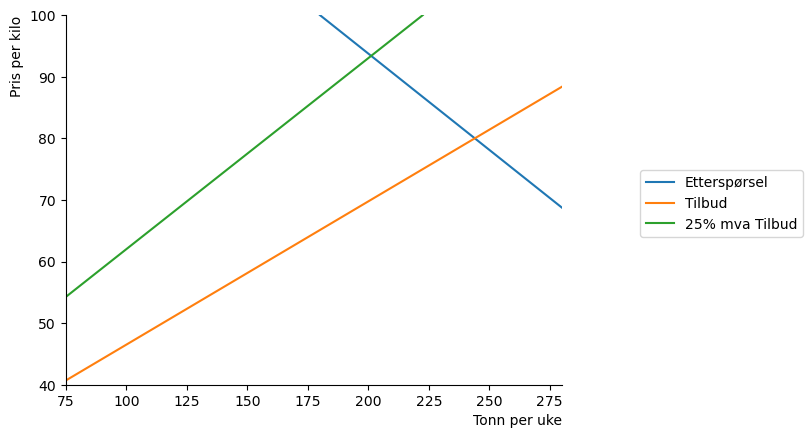

In [11]:


p_num=np.linspace(0.1,100,100)

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris per kilo', loc='top')
                ax.set_xlabel('Tonn per uke', loc='right')
                ax.set(xlim=(75,280))
                ax.set(ylim=(40,100))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

# plott funksjonene

ax.plot(x_d(p_num),p_num, label='Etterspørsel')
ax.plot(x_s(p_num, 0),p_num, label='Tilbud')
ax.plot(x_s(p_num, 1/4),p_num, label='25% mva Tilbud')

ax.legend(bbox_to_anchor=(1.5,0.6));
# Helningen blir brattere fordi den er prosentvis, uten mva har ingen prosentvis økning derfor er slakere helning

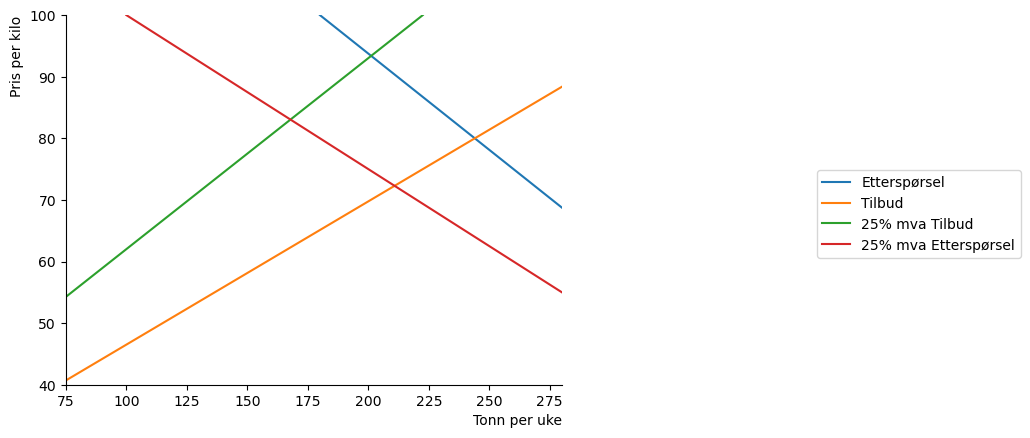

In [16]:
def x_d2(p,T):
    return 500 - 3.2*p*(1+T)


p_num=np.linspace(0.1,100,100)

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris per kilo', loc='top')
                ax.set_xlabel('Tonn per uke', loc='right')
                ax.set(xlim=(75,280))
                ax.set(ylim=(40,100))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

# plott funksjonene

ax.plot(x_d(p_num),p_num, label='Etterspørsel')
ax.plot(x_s(p_num, 0),p_num, label='Tilbud')
ax.plot(x_s(p_num, 1/4),p_num, label='25% mva Tilbud')
ax.plot(x_d2(p_num,1/4),p_num, label='25% mva Etterspørsel')
ax.legend(bbox_to_anchor=(1.5,0.6));

In [125]:
x,p,t,T=sp.symbols('x p t T', positive=True, real=True)

eq_l=sp.Eq(x_d3(p,T),x_s3(p,t))
p_eq=sp.solve(eq_l,p)
p_eq



[6000.0/(32.0*T - 43.0*t + 75.0)]

In [101]:
def x_d3(p,T):
    return 500 - 3.2*p*(1+T)
def x_s3(p,t):
    return -100+4.3*p*(1-t)



q_eq =sp.Eq(x_d3(p,T),x_s3(p,t))
q2_eq=sp.solve(q_eq,p)
q2_eq[0]


q_eq

Eq(-3.2*p*(T + 1) + 500, 4.3*p*(1 - t) - 100)

In [147]:
x_eq=x_s3(q2_eq[0],t)

x_eq_fn=sp.lambdify(
    (t,T), 
    x_eq
)

x_eq_fn(t,T)

x_eq_fn(0.25,0.25)

167.82006920415228

In [150]:
x_eq_fn(0,0)

244.0

In [151]:
x_eq_fn(0,0.25)

210.8433734939759

In [152]:
x_eq_fn(0.25,0)

201.16731517509726

In [148]:
p_eq_fn=sp.lambdify(
    (t,T), 
    p_eq[0]
)

p_eq_fn(t,T)
p_eq_fn(0.25,0.25)


83.04498269896193

In [153]:
p_eq_fn(0,0.25)

72.28915662650603

In [154]:
p_eq_fn(0.25,0)

93.3852140077821

In [155]:
p_eq_fn(0,0)

80.0

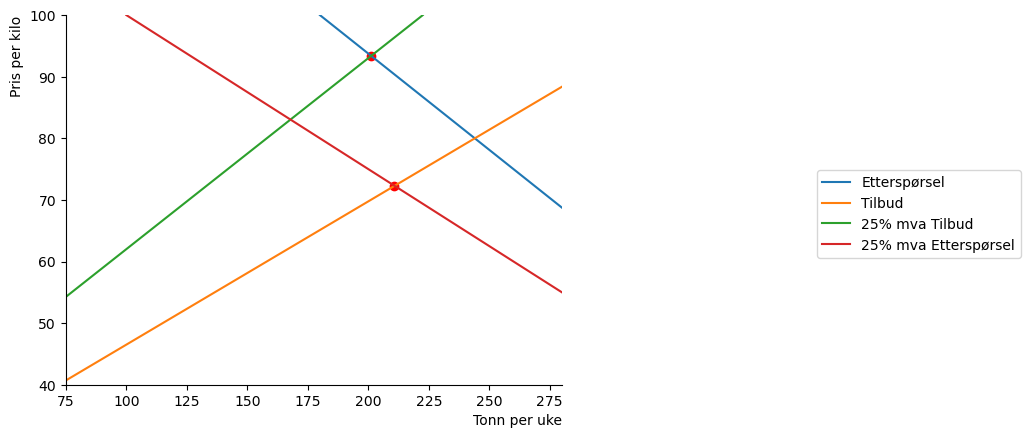

In [182]:
p_num=np.linspace(0.1,100,100)

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris per kilo', loc='top')
                ax.set_xlabel('Tonn per uke', loc='right')
                ax.set(xlim=(75,280))
                ax.set(ylim=(40,100))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

# plott funksjonene

ax.plot(x_d(p_num),p_num, label='Etterspørsel')
ax.plot(x_s(p_num, 0),p_num, label='Tilbud')
ax.plot(x_s(p_num, 1/4),p_num, label='25% mva Tilbud')
ax.plot(x_d2(p_num,1/4),p_num, label='25% mva Etterspørsel')
ax.legend(bbox_to_anchor=(1.5,0.6));


ax.scatter([201.1], [93.4], color = "red")
ax.scatter([210.8], [72.2], color = "red")


In [181]:
e = 72.2
t = 93.4
svaret = e-80
svaret2 = t-80
staten = t-e
7.8/(t-e)*100
#Staten får 21.4 altså forskjellen mellom de to markerte punktene
#konsumentene betaler 36,7% av avgiften. Produsentene betaler 63,3% av avgiften


36.79245283018867

In [172]:
#Fordelen med stykkprisavgift er at helningen på tilbuds og etterspørsel kurven blir konstant.

#

13.400000000000006

36.79245283018867